In [168]:
import sympy
from autograd import grad, jacobian

In [169]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.image import imread
from matplotlib.patches import Circle
import cvxpy as cp


In [170]:
z1 = [8, 12, 25, 32]
z2 = [34.5, 4, 13, 15]
z = np.stack((z1, z2), axis=1)

n,m = z.shape


x = cp.Variable((1,2))

objective = cp.Minimize(cp.sum_squares(x - z))
prob = cp.Problem(objective)
result = prob.solve()

print(f"The optimal value is {result}")
print(f"The optimal x is {x.value}")

opt_val1 = x.value

The optimal value is 869.4375
The optimal x is [[19.25  16.625]]


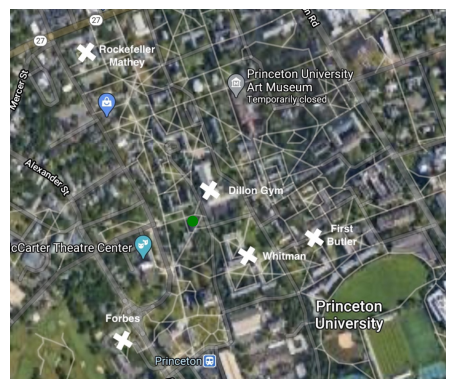

In [171]:
scale = 22
x1 = x.value[0][0]
x2 = x.value[0][1]
r = 0.5

colleges = imread('princetoncampus.jpeg')
colleges_flipped = np.flipud(colleges)
plt.imshow(colleges_flipped, origin='lower')
circle = Circle((x1*scale, x2*scale), r*scale, color = 'green')
plt.gca().add_patch(circle)
plt.axis('off')
plt.imshow(colleges_flipped, origin='lower')


In [172]:
x = np.linspace(0,1, 50)
y = np.linspace(0,1, 50)

X, Y = np.meshgrid(x,y)

# initializing the random coordinate grid
random_x = random.randint(0,49)
random_y = random.randint(0,49)
x0 = X[random_x][random_y]
y0 = Y[random_x][random_y]

z1 = (8, 34.5)
z2 = (12, 4)
z3 = (25, 13)
z4 = (32, 15)
z = [z1, z2, z3, z4]


# Constants for algorithm
tolerance = 1e-5
max_iters = 100


def model_equation(x, all_z_points):
  objective = 0 # Initialize objective function
  for zi in all_z_points:
    objective = objective + np.linalg.norm(x - zi)**2
  return objective

def grad_model(x, all_z_points):
  total_grad = np.zeros_like(x) # Initialize gradients
  for zi in all_z_points:
    total_grad = total_grad + 2 * (x - zi)
  return total_grad

X_init = np.array([x0, y0]) # Initialized once outside the loop

iter_count = 0

for iter_count in range(max_iters):
  grad = grad_model(X_init, z)

  # Check for convergence before line search
  if np.linalg.norm(grad) < tolerance:
    print(f"Converged at iteration {iter_count}")
    break
  # Calculate the exact stepsize "alpha"
  Q = 8 * np.eye(2)
  alpha = (grad.T @ grad) / (grad.T @ Q @ grad)

  X_next = X_init - alpha * grad
  X_init = X_next # Update X_init for the next iteration



print(f"Optimal Location for Dillon Gym: {X_init}\n")
print(f"Optimal Value: {model_equation(X_init, z)}")

offset = X_init

Converged at iteration 1
Optimal Location for Dillon Gym: [19.25  16.625]

Optimal Value: 869.4375


For alpha = 0.2222222222222222 the algorithm converged at iteration 55



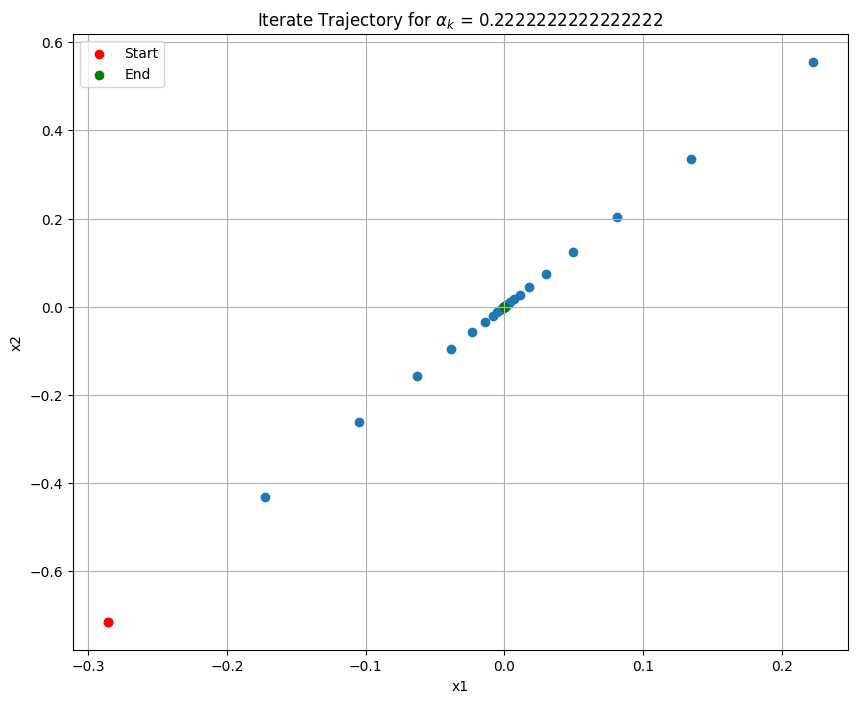

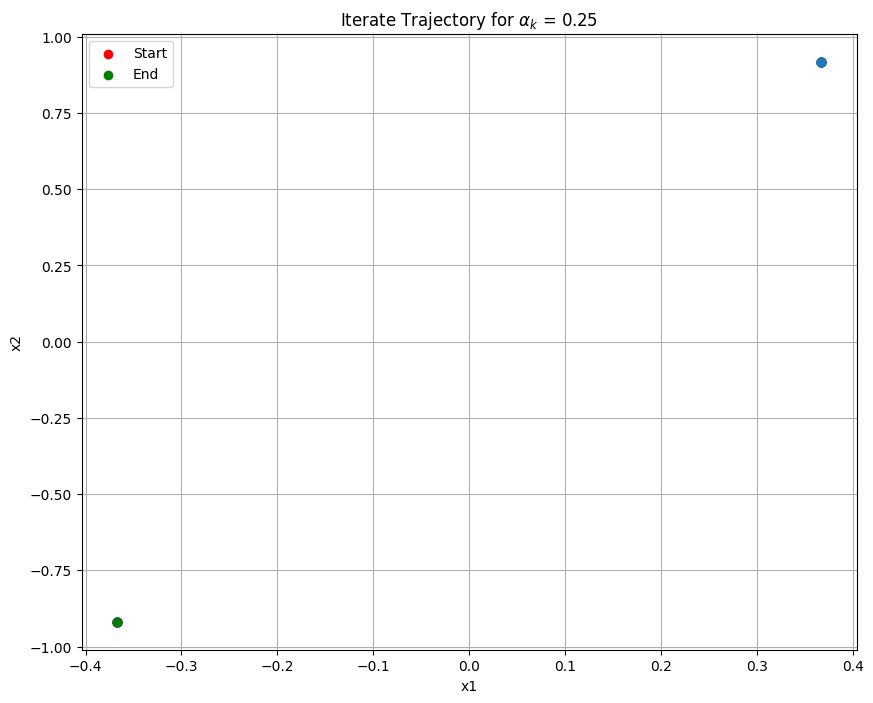

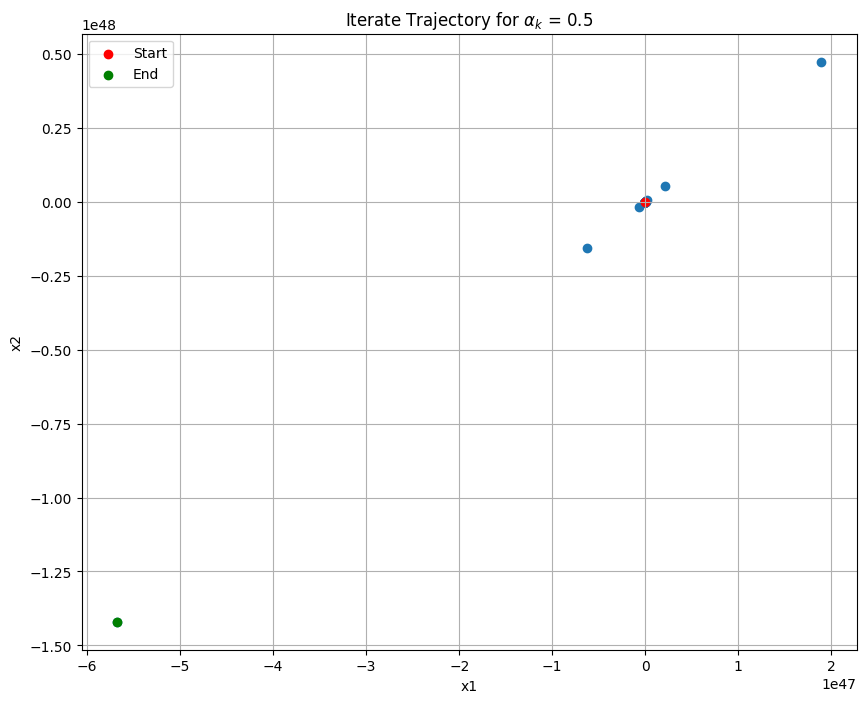

In [173]:
alphas = [2/9, 0.25, 0.5]

for alpha_k in alphas:

  X_init = np.array([x0, y0]) # Initialized once outside the loop
  iter_count = 0

  temp = []

  while iter_count < max_iters + 1:

    # 1. Calculate total gradient at X_init
    g = np.zeros_like(X_init, dtype=float)
    g = grad_model(X_init + offset, z)

    # 2. Set search direction (steepest descent)
    direction = -g

    # Check for convergence before line search
    if np.linalg.norm(g) < tolerance:
      print(f"For alpha = {alpha_k} the algorithm converged at iteration {iter_count}\n")
      break

    Bk = np.eye(2) # Steepest Descent
    delta_X = alpha_k * Bk @ direction
    X_next = X_init + delta_X
    X_init = X_next # Update X_init for the next iteration
    temp.append(X_init)

    iter_count += 1

  plt.figure(figsize=(10,8))
  plt.scatter([x[0] for x in temp], [x[1] for x in temp])
  # Adding labels to the start and end
  plt.scatter(temp[0][0], temp[0][1], color='red', label='Start')
  plt.scatter(temp[-1][0], temp[-1][1], color='green', label='End')
  plt.title(f"Iterate Trajectory for $\\alpha_k$ = {alpha_k}")
  plt.xlabel("x1")
  plt.ylabel("x2")
  plt.grid(True)
  plt.legend(loc='best')
  plt.show()

Starting all tests from: (13.09, 3.65)

--- Testing alpha = 0.2222 ---
For alpha = 0.2222 the algorithm converged at iteration 65



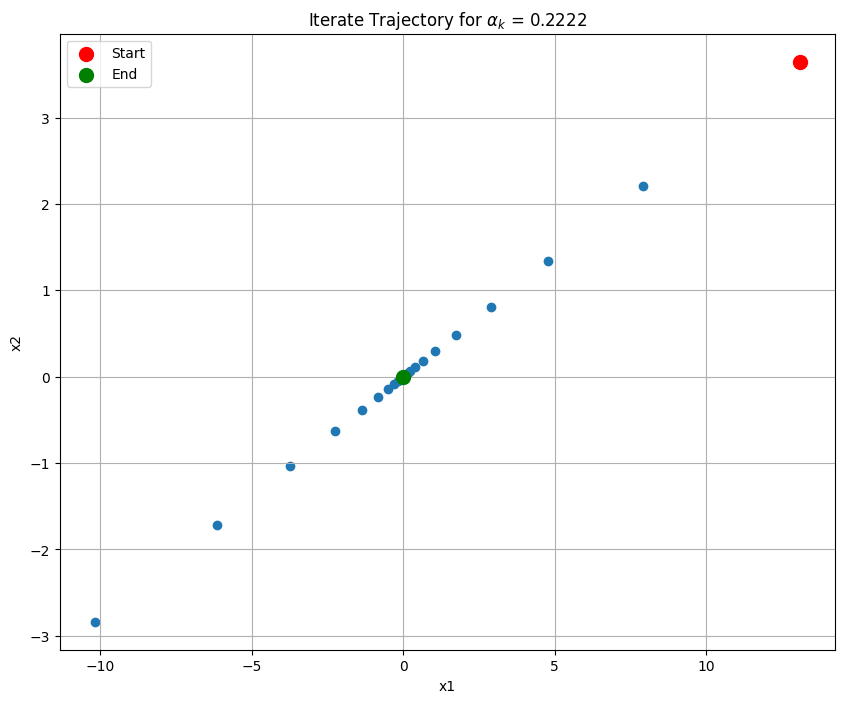

--- Testing alpha = 0.2500 ---
For alpha = 0.2500 the algorithm FAILED to converge in 100 iterations.



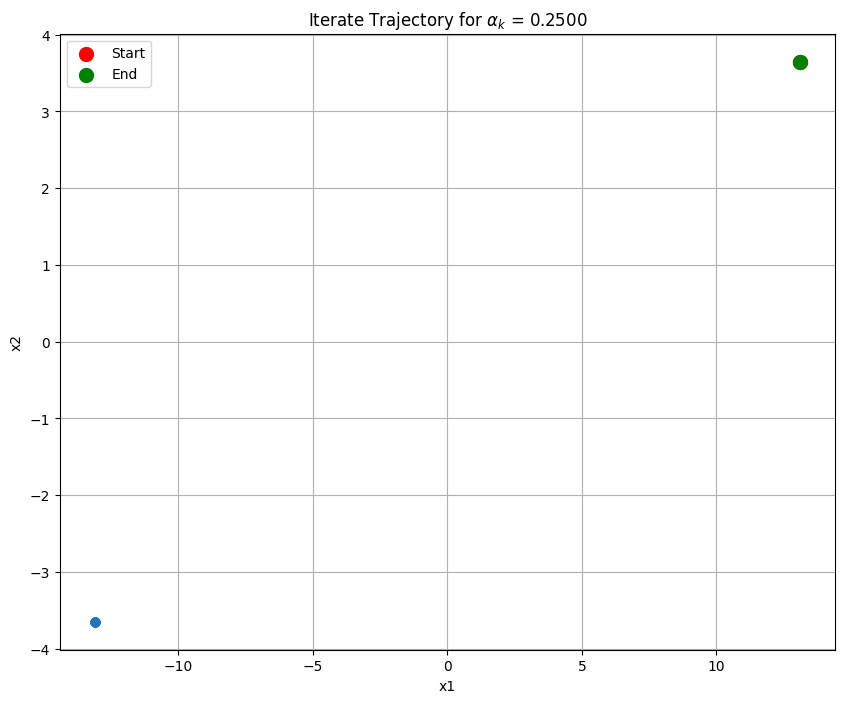

--- Testing alpha = 0.5000 ---
For alpha = 0.5000 the algorithm FAILED to converge in 100 iterations.



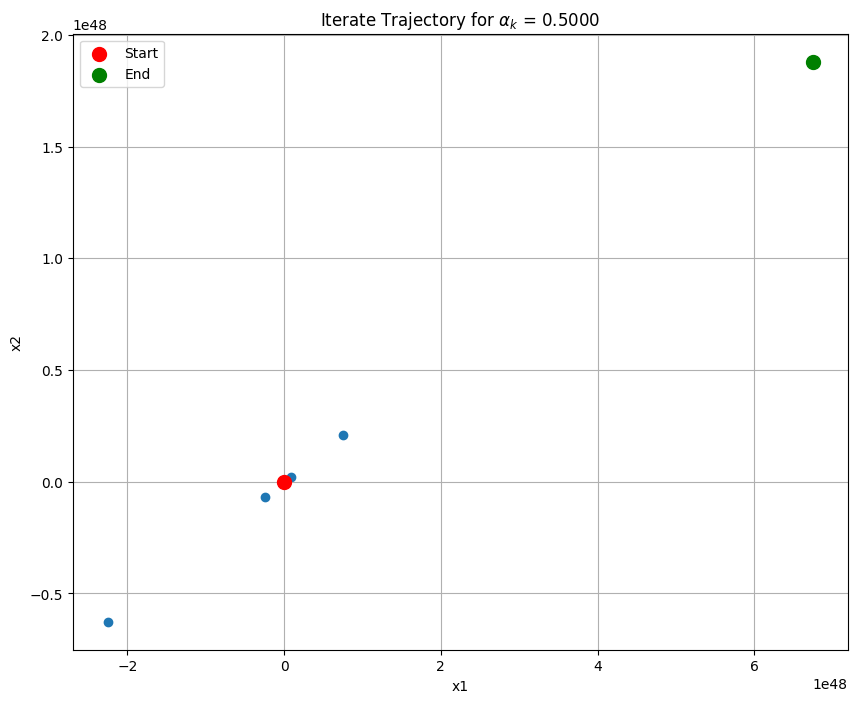

In [174]:
# Constants
tolerance = 1e-5
max_iters = 100

# Define the z-points as numpy arrays
z1 = np.array([8, 34.5])
z2 = np.array([12, 4])
z3 = np.array([25, 13])
z4 = np.array([32, 15])
z = [z1, z2, z3, z4]


start_point = np.random.rand(2) * 50
x0, y0 = start_point[0], start_point[1]
print(f"Starting all tests from: ({x0:.2f}, {y0:.2f})\n")


alphas = [2/9, 0.25, 0.5]

for alpha_k in alphas:

  print(f"--- Testing alpha = {alpha_k:.4f} ---")

  X_init = np.array([x0, y0]) # Initialized once outside the loop
  iter_count = 0

  temp = [X_init]


  while iter_count < 100:

    g = grad_model(X_init+offset, z)

    direction = -g

    # Check for convergence before line search
    if np.linalg.norm(g) < tolerance:
      print(f"For alpha = {alpha_k:.4f} the algorithm converged at iteration {iter_count}\n")
      break

    Bk = np.eye(2) # Steepest Descent
    delta_X = alpha_k * Bk @ direction
    X_next = X_init + delta_X
    X_init = X_next # Update X_init for the next iteration

    temp.append(X_init)

    iter_count += 1

  if iter_count == max_iters:
      print(f"For alpha = {alpha_k:.4f} the algorithm FAILED to converge in {max_iters} iterations.\n")

  plt.figure(figsize=(10,8))

  plt.scatter([x[0] for x in temp], [x[1] for x in temp])

  # Adding labels to the start and end
  plt.scatter(temp[0][0], temp[0][1], s=100, color='red', label='Start', zorder=5)
  plt.scatter(temp[-1][0], temp[-1][1], s=100, color='green', label='End', zorder=5)

  plt.title(f"Iterate Trajectory for $\\alpha_k$ = {alpha_k:.4f}")
  plt.xlabel("x1")
  plt.ylabel("x2")
  plt.grid(True)
  plt.legend(loc='best')

  plt.show()

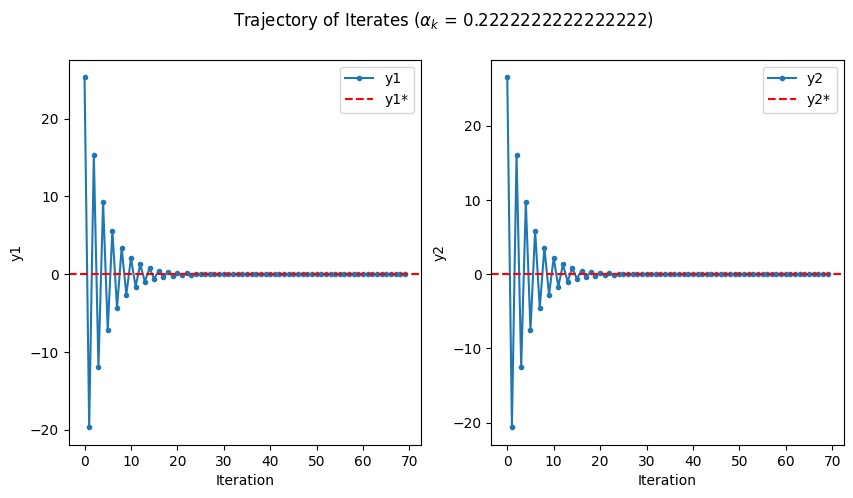

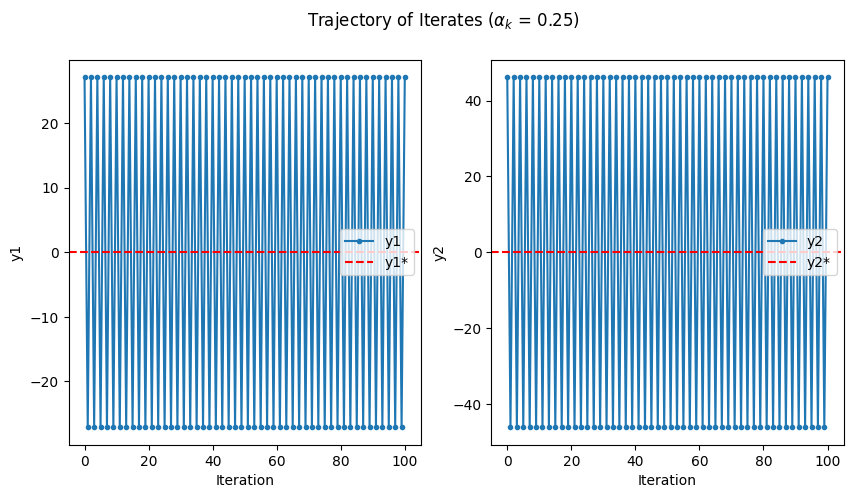

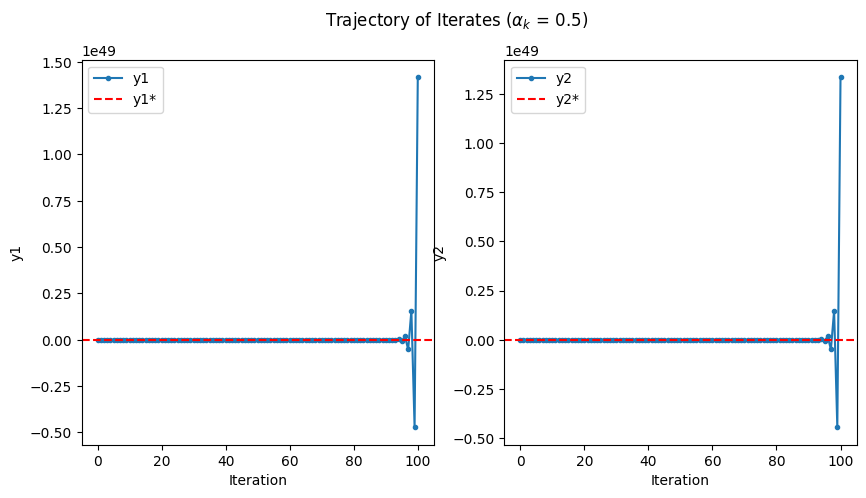

In [175]:
from matplotlib import lines
for alpha in alphas:
  start_point = np.random.rand(2) * 50
  x0, y0 = start_point[0], start_point[1]
  X_init = np.array([x0, y0]) # Initialized once outside the loop
  iterates_list = [X_init]

  alphas = [0.5, 0.25, 2/9]

  for iterates in range(100):
    g = grad_model(X_init + offset, z)


    if np.linalg.norm(g) < tolerance:
      break

    direction = -g
    Bk = np.eye(2) # Steepest Descent
    delta_X = alpha * Bk @ direction
    X_next = X_init + delta_X
    X_init = X_next # Update X_init for the next iteration
    iterates_list.append(X_next)

  # plotting the trajectory vs iterations
  iterates_array = np.asarray(iterates_list)
  idx = np.arange(len(iterates_array))

  fig, ax = plt.subplots(1,2,figsize=(10,5))
  plt.suptitle(f"Trajectory of Iterates ($\\alpha_k$ = {alpha})")
  ax[0].plot(idx, iterates_array[:,0], label='y1', marker='.')
  ax[0].axhline(0, color='r', linestyle='--', label='y1*')
  ax[0].legend()
  ax[0].set_xlabel('Iteration')
  ax[0].set_ylabel('y1')


  ax[1].plot(idx, iterates_array[:,1], label='y2',marker='.')
  ax[1].set_xlabel('Iteration')
  ax[1].set_ylabel('y2')
  ax[1].axhline(0, color='r', linestyle='--', label='y2*')
  ax[1].legend()

  plt.show()

### Part 2


The optimal value is 1391.848216123791
The optimal x is [[28.51456619 23.31607558]]


/usr/local/lib/python3.12/dist-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(


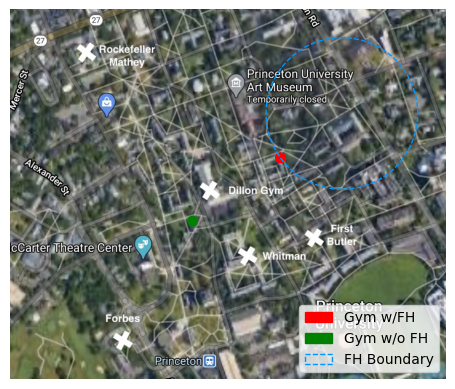

In [176]:
z1 = [8, 12, 25, 32]
z2 = [34.5, 4, 13, 15]
z = np.stack((z1, z2), axis=1)
hydrant_loc = [35,28]


x = cp.Variable((1,2))


objective = cp.Minimize(cp.sum_squares(x - z))
constraints = [cp.norm(x - np.array(hydrant_loc)) <= 8]
prob = cp.Problem(objective, constraints)
result = prob.solve()

print(f"The optimal value is {result}")
print(f"The optimal x is {x.value}")

scale = 22
x1 = x.value[0][0]
x2 = x.value[0][1]
r = 0.5

p1 = opt_val1[0][0]
p2 = opt_val1[0][1]

colleges = imread('princetoncampus.jpeg')
colleges_flipped = np.flipud(colleges)
plt.imshow(colleges_flipped, origin='lower')
opt_pt1 = Circle((p1*scale, p2*scale), r*scale, color = 'green', label="Gym w/o FH")
opt_pt2 = Circle((x1*scale, x2*scale), r*scale, color = 'red', label="Gym w/FH")
boundary = Circle((35*scale, 28*scale), 8*scale, color = '#0096FF', fill=False, linestyle="--", label='FH Boundary')
plt.gca().add_patch(opt_pt2)
plt.gca().add_patch(opt_pt1)
plt.gca().add_patch(boundary)
plt.axis('off')
plt.imshow(colleges_flipped, origin='lower')
plt.legend(loc='lower right')

# **Question 2**


Text(0, 0.5, 'Temperature (°F)')

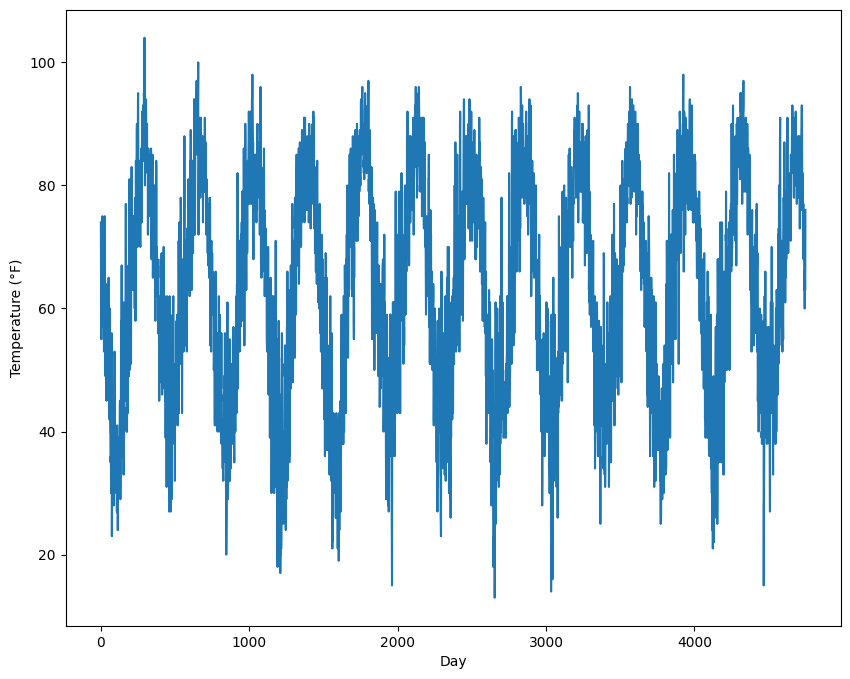

In [177]:
data = np.loadtxt('TemperatureNewYork.csv')
plt.figure(figsize=(10,8))
plt.plot(data)
plt.xlabel("Day")
plt.ylabel("Temperature (°F)")

In [178]:
import autograd.numpy as anp

m,  = data.shape
max_iters = 50
tol = 1e-6

time = np.arange(1, m+1, 1)
new_data = np.stack((time, data), axis=1)

# formating the Temperature and time data
T = new_data[:,1]
t = new_data[:,0]

# Define a function where the parameters to be optimized are the first arguments
def residual_model(params, T_data, t_data):
    a, Te, phi, b, c = params
    return T_data - (a * anp.sin((2*anp.pi/Te) * t_data + phi) + b*t_data + c)

# Get the Jacobian of model with respect to its first argument (params)
jacobian_model = jacobian(residual_model, argnum=0)

# Initialize parameters as a NumPy array of floats
X_init = anp.array([120., 360., anp.pi, 0., 0.])

for i in range(max_iters):
  print(f"Iteration {i+1}")
  # Calculate the function value (residuals)
  g_val = residual_model(X_init, T, t)

  # Calculate the Jacobian matrix
  # jacob should be (m, 5)
  jacob = jacobian_model(X_init, T, t)

  #(Gauss-Newton): X_next = X_init - (J^T J)^-1 J^T g_val
  delta_X = anp.linalg.inv(jacob.T @ jacob) @ jacob.T @ g_val

  X_next = X_init - delta_X

  if anp.linalg.norm(X_next - X_init) < tol:
    break
  X_init = X_next

print(f"Optimal parameters X: {X_init}\n")
print(f"Optimal Earth Orbit: {X_init[1]}\n")

Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Optimal parameters X: [2.24288108e+01 3.65281178e+02 2.76773704e+00 2.40311706e-04
 6.29178383e+01]

Optimal Earth Orbit: 365.28117778039774



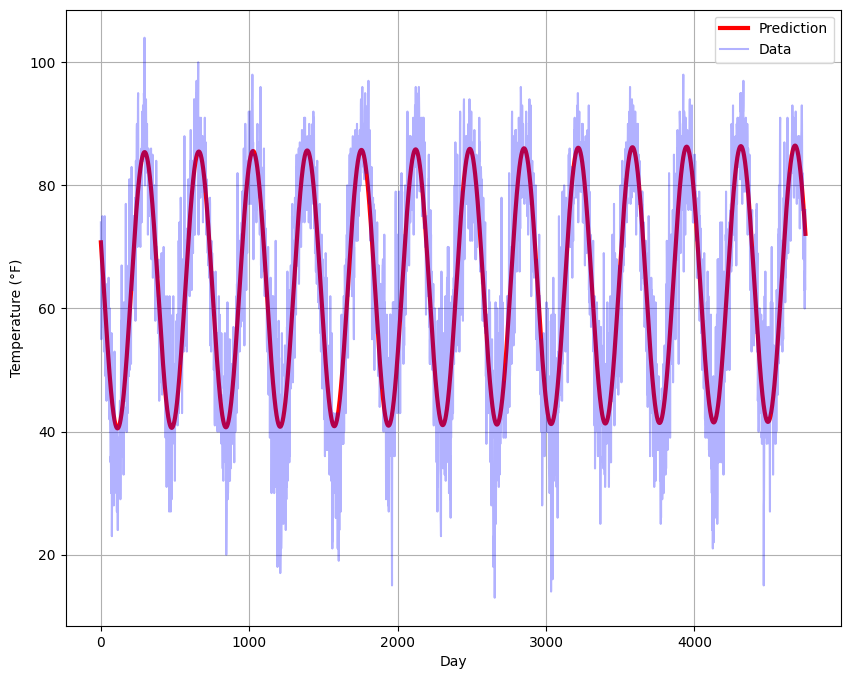

In [179]:
g = lambda params, T, t: params[0] * np.sin((2*np.pi/params[1]) * t + params[2]) + params[3] * t + params[4]

T_pred = g(X_init, T, t)

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(T_pred, label="Prediction", color='r', linewidth=3)
ax.plot(data, label="Data", color='b', alpha=0.3)
ax.set_xlabel("Day")
ax.set_ylabel("Temperature (°F)")
ax.grid(True)
ax.legend(loc='best')